# chembl_webresource_client demo

### ChEMBL Group, EMBL-EBI

## Introduction

This is the only official Python client library developed and supported by ChEMBL group.

The library helps accessing ChEMBL data and cheminformatics tools from Python. You don't need to know how to write SQL. You don't need to know how to interact with REST APIs. You don't need to compile or install any cheminformatics frameworks. Results are cached.

The client handles interaction with the HTTPS protocol and caches all results in the local file system for faster retrieval. Abstracting away all network-related tasks, the client provides the end user with a convenient interface, giving the impression of working with a local resource. Design is based on the Django QuerySet interface. The client also implements lazy evaluation of results, which means it will only evaluate a request for data when a value is required. This approach reduces number of network requests and increases performance.

Please note that the code below attempts to balance clarity and brevity, and is not intended to be a template for production code: error checking, for example, should be much more thorough in practice. 

## Configuration and setup

In [1]:
import logging
from collections import Counter
from operator import itemgetter
from IPython.display import Image, display

In [2]:
# Python modules used for API access...
from chembl_webresource_client.new_client import new_client

## List of available resources
It's easy to get a list of available resources by invoking:

In [3]:
available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)
print(len(available_resources))

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'document_term', 'drug', 'drug_indication', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_class', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_prediction', 'target_relation', 'tissue', 'xref_source']
35


Which means there are 35 different types of resources available _via_ web services. In this notebook only the most important of these are covered.

## Molecules

Molecule records may be retrieved in a number of ways, such as lookup of single molecules using various identifiers or searching for compounds _via_ substruture or similarity. 

In [4]:
# Get a molecule-handler object for API access and check the connection to the database...
molecule = new_client.molecule
molecule.set_format('json')
print("%s molecules available in ChEMBL" % len(molecule.all()))

1879206 molecules available in ChEMBL


### Getting a single molecule

In order to retrieve a single molecule from the web services, you need to know its unique and unambiguous identifier. In case of molecule resource this can be one of three types:

 1. ChEMBL_ID
 2. InChI Key
 3. Canonical SMILES (non-canonical SMILES will be covered later in this notebook)

In [5]:
# so this:
# 1.
m1 = molecule.get('CHEMBL25')
# 2.
m2 = molecule.get('BSYNRYMUTXBXSQ-UHFFFAOYSA-N')
#
m3 = molecule.get('CC(=O)Oc1ccccc1C(=O)O')
# will return the same data:
m1 == m2 == m3

True

### ChEMBL ID

All the main entities in the ChEMBL database have a ChEMBL ID. It is a stable identifier designed for straightforward lookup of data.

In [6]:
# Lapatinib, the bioactive component of the anti-cancer drug Tykerb
chembl_id = "CHEMBL554" 

In [7]:
# Get compound record using client...
record_via_client = molecule.get(chembl_id)
record_via_client

{'atc_classifications': ['L01XE07'],
 'availability_type': '1',
 'biotherapeutic': None,
 'black_box_warning': '1',
 'chebi_par_id': 49603,
 'chirality': '2',
 'cross_references': [{'xref_id': 'lapatinib%20ditosylate',
   'xref_name': 'lapatinib ditosylate',
   'xref_src': 'DailyMed'},
  {'xref_id': '103905567',
   'xref_name': 'SID: 103905567',
   'xref_src': 'PubChem'},
  {'xref_id': '103905568',
   'xref_name': 'SID: 103905568',
   'xref_src': 'PubChem'},
  {'xref_id': '144206058',
   'xref_name': 'SID: 144206058',
   'xref_src': 'PubChem'},
  {'xref_id': '170465125',
   'xref_name': 'SID: 170465125',
   'xref_src': 'PubChem'},
  {'xref_id': '50100107', 'xref_name': 'SID: 50100107', 'xref_src': 'PubChem'},
  {'xref_id': 'Lapatinib', 'xref_name': None, 'xref_src': 'Wikipedia'}],
 'dosed_ingredient': True,
 'first_approval': 2007,
 'first_in_class': '0',
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': '0',
 'max_phase': 4,
 'molecule_chembl_id': 'CHEMBL554',
 'mo

### InChIKey

Compound records may also be retrieved _via_ InChI Key lookup.

In [8]:
# InChI Key for Lapatinib
inchi_key = "BCFGMOOMADDAQU-UHFFFAOYSA-N"

# getting molecule via client
molecule.set_format('json')
record_via_client = molecule.get(inchi_key)
record_via_client

{'atc_classifications': ['L01XE07'],
 'availability_type': '1',
 'biotherapeutic': None,
 'black_box_warning': '1',
 'chebi_par_id': 49603,
 'chirality': '2',
 'cross_references': [{'xref_id': 'lapatinib%20ditosylate',
   'xref_name': 'lapatinib ditosylate',
   'xref_src': 'DailyMed'},
  {'xref_id': '103905567',
   'xref_name': 'SID: 103905567',
   'xref_src': 'PubChem'},
  {'xref_id': '103905568',
   'xref_name': 'SID: 103905568',
   'xref_src': 'PubChem'},
  {'xref_id': '144206058',
   'xref_name': 'SID: 144206058',
   'xref_src': 'PubChem'},
  {'xref_id': '170465125',
   'xref_name': 'SID: 170465125',
   'xref_src': 'PubChem'},
  {'xref_id': '50100107', 'xref_name': 'SID: 50100107', 'xref_src': 'PubChem'},
  {'xref_id': 'Lapatinib', 'xref_name': None, 'xref_src': 'Wikipedia'}],
 'dosed_ingredient': True,
 'first_approval': 2007,
 'first_in_class': '0',
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': '0',
 'max_phase': 4,
 'molecule_chembl_id': 'CHEMBL554',
 'mo

### SMILES

Compound records may also be retrieved _via_ SMILES lookup.

The purpose of the `get` method is to return objects identified by their unique and unambiguous properties.
This is why SMILES provided as arguments to the `get` method need to be canonical.
But you can still search for molecules, using non-canonical SMILES - this functionaly will be covered later in this notebook.

In [9]:
# Canonoical SMILES for Lapatinib
canonical_smiles = "CS(=O)(=O)CCNCc1oc(cc1)c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2"

# getting molecule via client
molecule.set_format('json')
record_via_client = molecule.get(canonical_smiles)
record_via_client

{'atc_classifications': ['L01XE07'],
 'availability_type': '1',
 'biotherapeutic': None,
 'black_box_warning': '1',
 'chebi_par_id': 49603,
 'chirality': '2',
 'cross_references': [{'xref_id': 'lapatinib%20ditosylate',
   'xref_name': 'lapatinib ditosylate',
   'xref_src': 'DailyMed'},
  {'xref_id': '103905567',
   'xref_name': 'SID: 103905567',
   'xref_src': 'PubChem'},
  {'xref_id': '103905568',
   'xref_name': 'SID: 103905568',
   'xref_src': 'PubChem'},
  {'xref_id': '144206058',
   'xref_name': 'SID: 144206058',
   'xref_src': 'PubChem'},
  {'xref_id': '170465125',
   'xref_name': 'SID: 170465125',
   'xref_src': 'PubChem'},
  {'xref_id': '50100107', 'xref_name': 'SID: 50100107', 'xref_src': 'PubChem'},
  {'xref_id': 'Lapatinib', 'xref_name': None, 'xref_src': 'Wikipedia'}],
 'dosed_ingredient': True,
 'first_approval': 2007,
 'first_in_class': '0',
 'helm_notation': None,
 'indication_class': None,
 'inorganic_flag': '0',
 'max_phase': 4,
 'molecule_chembl_id': 'CHEMBL554',
 'mo

### Batch queries

Multiple records may be requested at once. The `get` method can accept a list of homogenous identifiers.

In [10]:
records1 = molecule.get(['CHEMBL6498', 'CHEMBL6499', 'CHEMBL6505'])
records2 = molecule.get(['XSQLHVPPXBBUPP-UHFFFAOYSA-N', 'JXHVRXRRSSBGPY-UHFFFAOYSA-N', 'TUHYVXGNMOGVMR-GASGPIRDSA-N'])
records3 = molecule.get(['CNC(=O)c1ccc(cc1)N(CC#C)Cc2ccc3nc(C)nc(O)c3c2',
            'Cc1cc2SC(C)(C)CC(C)(C)c2cc1\\N=C(/S)\\Nc3ccc(cc3)S(=O)(=O)N',
            'CC(C)C[C@H](NC(=O)[C@@H](NC(=O)[C@H](Cc1c[nH]c2ccccc12)NC(=O)[C@H]3CCCN3C(=O)C(CCCCN)CCCCN)C(C)(C)C)C(=O)O'])
records1 == records2 == records3

True

Please note that the length of url can't be more than 4000 characters. This is why url-based approach should not be used for a very long lists of identifiers. Also `molecule.get` call needs to be modified slightly in that case.

In [11]:
# Generate a list of 300 ChEMBL IDs (N.B. not all will be valid)...
chembl_ids = ['CHEMBL{}'.format(x) for x in range(1, 301)]

# Get compound records, note `molecule_chembl_id` named parameter.
# Named parameters should always be used for longer lists
records = molecule.get(molecule_chembl_id=chembl_ids)
len(records)

170

Note that we expect to see a number that is less than 300. This is because for some identifiers in range `(CHEMBL1, ..., CHEMBL300)` there are no molecule mapped to them.

### Filtering
All resources available through ChEMBL web services can be filtered.
Some examples of filtering applied to molecules:

1. Get all approved drugs
2. Get all molecules in ChEMBL with no Rule-of-Five violations
3. Get all biotherapeutic molecules
4. Return molecules with molecular weight <= 300
5. Return molecules with molecular weight <= 300 AND pref_name ends with -nib

In [12]:
# 1. Get all approved drugs
approved_drugs = molecule.filter(max_phase=4)

# 2. Get all molecules in ChEMBL with no Rule-of-Five violations
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)

# 3. Get all biotherapeutic molecules
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)

# 4. Return molecules with molecular weight <= 300
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

# 5. Return molecules with molecular weight <= 300 AND pref_name ends with nib
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300).filter(pref_name__iendswith="nib")

With the client-generated results, we no not have to worry about pagination:

In [13]:
# The QuerySet object returned by the client is a lazily-evaluated iterator
# This means that it's ready to use and it will try to reduce the amount of server requests
# All results are cached as well so they are fetched from server only once.
approved_drugs = molecule.filter(max_phase=4)

# Getting the lenght of the whole result set is easy:
print(len(approved_drugs))

# So is getting a single element:
print(approved_drugs[123])

# Or a chunk of elements:
print(approved_drugs[2:5])

# Or using in the loops or list comprehensions:
drug_smiles = [drug['molecule_structures']['canonical_smiles'] for drug in approved_drugs if drug['molecule_structures']]
print(len(drug_smiles))

3811
{'atc_classifications': ['L01XX19'], 'availability_type': '1', 'biotherapeutic': None, 'black_box_warning': '1', 'chebi_par_id': 80630, 'chirality': '1', 'cross_references': [{'xref_id': 'irinotecan%20hydrochloride', 'xref_name': 'irinotecan hydrochloride', 'xref_src': 'DailyMed'}, {'xref_id': '124893595', 'xref_name': 'SID: 124893595', 'xref_src': 'PubChem'}, {'xref_id': 'Irinotecan', 'xref_name': None, 'xref_src': 'Wikipedia'}], 'dosed_ingredient': True, 'first_approval': 1996, 'first_in_class': '0', 'helm_notation': None, 'indication_class': 'Antineoplastic (DNA topoisomerase I Inhibitor)', 'inorganic_flag': '0', 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL481', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL481', 'parent_chembl_id': 'CHEMBL481'}, 'molecule_properties': {'acd_logd': '2.08', 'acd_logp': '3.73', 'acd_most_apka': '11.2', 'acd_most_bpka': '9.33', 'alogp': '4.09', 'aromatic_rings': 3, 'full_molformula': 'C33H38N4O6', 'full_mwt': '586.69', 'hba': 9, 'hba_lipins

### Ordering results
Similar to filtering, it's also possible to order the result set, there is a parameter called `order_by` that is reposnsible for ordering:

In [14]:
# Sort approved drugs by molecular weight ascending (from lightest to heaviest) and get the first (lightest) element
lightest_drug = molecule.filter(max_phase=4).order_by('molecule_properties__mw_freebase')[0]
lightest_drug['pref_name']

'HELIUM'

In [15]:
# Sort approved drugs by molecular weight descending (from heaviest to lightest) and get the first (heaviest) element
heaviest_drug = molecule.filter(max_phase=4).order_by('-molecule_properties__mw_freebase')[0]
heaviest_drug['pref_name']

'CISPLATIN'

### Filtering molecules using SMILES
It is possible to filter molecules by SMILES

In [16]:
# Atorvastatin...
smiles = "CC(C)c1c(C(=O)Nc2ccccc2)c(c3ccccc3)c(c4ccc(F)cc4)n1CC[C@@H](O)C[C@@H](O)CC(=O)O"

# By default, the type of search used is 'exact search' which means that only compounds with exacly same SMILES string will be picked:
result = molecule.filter(molecule_structures__canonical_smiles=smiles)
print(len(result))

# This is quivalent of:
result1 = molecule.filter(molecule_structures__canonical_smiles__exact=smiles)
print(len(result1))

# For convenience, we have a shortcut call:
result2 = molecule.filter(smiles=smiles)
print(len(result2))

# Checking if they are all the same: 
print(result[0]['pref_name'] == result1[0]['pref_name'] == result2[0]['pref_name'])

# And because SMILES string are unique in ChEMBL, this is similar to:
result3 = molecule.get(smiles)
print(result[0]['pref_name'] == result3['pref_name'])

1
1
1
True
True


There are however different filtering operators that can be applied to SMILES; the most important one is called `flexmatch`, which will return all structures described by given SMILES string even if this is non-canonical SMILES.

In [17]:
# Flexmatch will look for structures that match given SMILES, ignoring stereo:
records = molecule.filter(molecule_structures__canonical_smiles__flexmatch=smiles)
print(len(records))

for record in records:
    print("{:15s} : {}".format(record["molecule_chembl_id"], record['molecule_structures']['canonical_smiles']))

3
CHEMBL1487      : CC(C)c1c(C(=O)Nc2ccccc2)c(c3ccccc3)c(c4ccc(F)cc4)n1CC[C@@H](O)C[C@@H](O)CC(=O)O
CHEMBL1790017   : CC(C)c1c(C(=O)Nc2ccccc2)c(c3ccccc3)c(c4ccc(F)cc4)n1CC[C@@H](O)C[C@@H](O)CC(=O)O.CC(C)c5c(C(=O)Nc6ccccc6)c(c7ccccc7)c(c8ccc(F)cc8)n5CC[C@@H](O)C[C@@H](O)CC(=O)O
CHEMBL3392029   : CC(C)c1c(C(=O)Nc2ccccc2)c(c3ccccc3)c(c4ccc(F)cc4)n1CC[C@H](O)C[C@@H](O)CC(=O)O


Unlike with the exact string match, it is possible to retrieve multiple records when a SMILES is used for the `flexmatch` lookup (_i.e._ it is potentially one-to-many instead of one-to-one as the ID lookups are). This is due to the nature of `flexmatch`.

In our case two structures are returned, CHEMBL1487 (Atorvastatin) and CHEMBL1207181, which is the same structure as the former but with one of the two stereocentres undefined.

### Substructure-searching

As well as ID lookups, the web services may also be used to perform substructure searches. Currently, only SMILES-based searches are supported, although this could change if there is is a need for more powerful search abilities (_e.g._ SMARTS searching).

In [18]:
# Lapatinib contains the following core...
query = "c4ccc(Nc2ncnc3ccc(c1ccco1)cc23)cc4"

In [19]:
# Perform substructure search on query using client
substructure = new_client.substructure
records = substructure.filter(smiles=query)
records

[{'atc_classifications': ['L01XE07'], 'availability_type': '1', 'biotherapeutic': None, 'black_box_warning': '1', 'chebi_par_id': 49603, 'chirality': '2', 'cross_references': [{'xref_id': 'lapatinib%20ditosylate', 'xref_name': 'lapatinib ditosylate', 'xref_src': 'DailyMed'}, {'xref_id': '103905567', 'xref_name': 'SID: 103905567', 'xref_src': 'PubChem'}, {'xref_id': '103905568', 'xref_name': 'SID: 103905568', 'xref_src': 'PubChem'}, {'xref_id': '144206058', 'xref_name': 'SID: 144206058', 'xref_src': 'PubChem'}, {'xref_id': '170465125', 'xref_name': 'SID: 170465125', 'xref_src': 'PubChem'}, {'xref_id': '50100107', 'xref_name': 'SID: 50100107', 'xref_src': 'PubChem'}, {'xref_id': 'Lapatinib', 'xref_name': None, 'xref_src': 'Wikipedia'}], 'dosed_ingredient': True, 'first_approval': 2007, 'first_in_class': '0', 'helm_notation': None, 'indication_class': None, 'inorganic_flag': '0', 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL554', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL554', '

### Similarity searching

The web services may also be used to perform SMILES-based similarity searches.

In [20]:
# Lapatinib
smiles = "CS(=O)(=O)CCNCc1oc(cc1)c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2"

In [21]:
# Note that a percentage similarity must be supplied.
similarity = new_client.similarity
res = similarity.filter(smiles=smiles, similarity=85)
len(res)

37

In [22]:
res

[{'atc_classifications': ['L01XE07'], 'availability_type': '1', 'biotherapeutic': None, 'black_box_warning': '1', 'chebi_par_id': 49603, 'chirality': '2', 'cross_references': [{'xref_id': 'lapatinib%20ditosylate', 'xref_name': 'lapatinib ditosylate', 'xref_src': 'DailyMed'}, {'xref_id': '103905567', 'xref_name': 'SID: 103905567', 'xref_src': 'PubChem'}, {'xref_id': '103905568', 'xref_name': 'SID: 103905568', 'xref_src': 'PubChem'}, {'xref_id': '144206058', 'xref_name': 'SID: 144206058', 'xref_src': 'PubChem'}, {'xref_id': '170465125', 'xref_name': 'SID: 170465125', 'xref_src': 'PubChem'}, {'xref_id': '50100107', 'xref_name': 'SID: 50100107', 'xref_src': 'PubChem'}, {'xref_id': 'Lapatinib', 'xref_name': None, 'xref_src': 'Wikipedia'}], 'dosed_ingredient': True, 'first_approval': 2007, 'first_in_class': '0', 'helm_notation': None, 'indication_class': None, 'inorganic_flag': '0', 'max_phase': 4, 'molecule_chembl_id': 'CHEMBL554', 'molecule_hierarchy': {'molecule_chembl_id': 'CHEMBL554', '

### Versions for a parent structure

The versions (_e.g._ salt forms) for a parent compound may be retrieved for a ChEMBL ID. Keep in mind that a parent structure is one that has had salt/solvate components removed; it corresponds to the bioactive moiety and its use facilitates structure searching, comparison _etc_. A compound without salt/solvate components is its own parent.

In [23]:
# Neostigmine (a parent)...
chembl_id = "CHEMBL278020" 

In [24]:
records = new_client.molecule_form.get(chembl_id)['molecule_forms']
records

[{'is_parent': True,
  'molecule_chembl_id': 'CHEMBL278020',
  'parent_chembl_id': 'CHEMBL278020'},
 {'is_parent': False,
  'molecule_chembl_id': 'CHEMBL54126',
  'parent_chembl_id': 'CHEMBL278020'},
 {'is_parent': False,
  'molecule_chembl_id': 'CHEMBL211471',
  'parent_chembl_id': 'CHEMBL278020'}]

The ChEMBL ID lookup service may now be used to get the full records for the salt forms...

In [25]:
for chembl_id in [x["molecule_chembl_id"] for x in records if x["is_parent"] == False]:
    record = new_client.molecule.get(chembl_id)          
    print("{:10s} : {}".format(chembl_id, record['molecule_structures']['canonical_smiles']))

CHEMBL54126 : [Br-].CN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C
CHEMBL211471 : COS(=O)(=O)[O-].CN(C)C(=O)Oc1cccc(c1)[N+](C)(C)C


### Drug mechanism(s) of action

The mechanisms of action of marketed drugs may be retrieved.

Note that this data may not be recorded for the parent structure, but rather for one of its versions. For example, the marketed drug, Tykerb, containing the active ingredient Lapatinib (CHEMBL554) is actually the ditosylate monohydrate (CHEMBL1201179).

In [26]:
# Molecule forms for Lapatinib are used here...
for chembl_id in (x["molecule_chembl_id"] for x in new_client.molecule_form.get("CHEMBL554")['molecule_forms']):
    print("The recorded mechanisms of action of '{}' are...".format(chembl_id))
    mechanism_records = new_client.mechanism.filter(molecule_chembl_id=chembl_id)
    if mechanism_records:
        for mech_rec in mechanism_records:
            print("{:10s} : {}".format(mech_rec["molecule_chembl_id"], mech_rec["mechanism_of_action"]))
    print("-" * 50)

The recorded mechanisms of action of 'CHEMBL554' are...
--------------------------------------------------
The recorded mechanisms of action of 'CHEMBL1076241' are...
--------------------------------------------------
The recorded mechanisms of action of 'CHEMBL1201179' are...
CHEMBL1201179 : Receptor protein-tyrosine kinase erbB-2 inhibitor
CHEMBL1201179 : Epidermal growth factor receptor erbB1 inhibitor
--------------------------------------------------
The recorded mechanisms of action of 'CHEMBL3526325' are...
--------------------------------------------------


### Image query

The webservice may be used to obtain a PNG image of a compound.

In [27]:
# Lapatinib ditosylate monohydrate (Tykerb)
chembl_id = "CHEMBL1201179" 

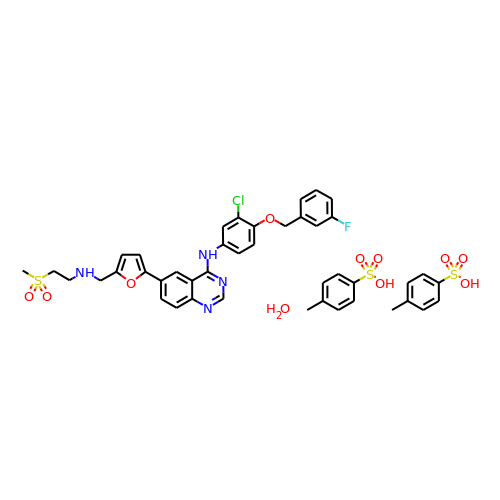

In [28]:
png = new_client.image.get(chembl_id)
Image(png)

### Bioactivities

All bioactivity records for a compound may be retrieved _via_ its ChEMBL ID.


In [29]:
# Lapatinib
chembl_id = "CHEMBL554" 

In [30]:
records = new_client.activity.filter(molecule_chembl_id=chembl_id)
len(records), records[:2]

(2118,
 [{'activity_comment': None, 'activity_id': 190221, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL674106', 'assay_description': 'Inhibitory activity against epidermal growth factor receptor', 'assay_type': 'B', 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'canonical_smiles': 'CS(=O)(=O)CCNCc1oc(cc1)c2ccc3ncnc(Nc4ccc(OCc5cccc(F)c5)c(Cl)c4)c3c2', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1146682', 'document_journal': 'Bioorg. Med. Chem. Lett.', 'document_year': 2004, 'ligand_efficiency': {'bei': '13.77', 'le': '0.27', 'lle': '1.86', 'sei': '7.52'}, 'molecule_chembl_id': 'CHEMBL554', 'molecule_pref_name': 'LAPATINIB', 'parent_molecule_chembl_id': 'CHEMBL554', 'pchembl_value': '8', 'potential_duplicate': True, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 15408, 'relation': '=', 'src_id': 1, 'standard_flag': True, 'standard_relation': '=', 'stand

## Targets

The webservices may also be used to obtain information on biological targets, _i.e._ the entities, such as proteins, cells or organisms, with which compounds interact.


In [31]:
# Like with any other resource type, a complete list of targets can be requested using the client:
records = new_client.target.all()
len(records)

12482

In [32]:
records[:4]

[{'cross_references': [{'xref_id': 'Maltase-glucoamylase', 'xref_name': None, 'xref_src': 'Wikipedia'}, {'xref_id': 'O43451', 'xref_name': None, 'xref_src': 'canSAR-Target'}], 'organism': 'Homo sapiens', 'pref_name': 'Maltase-glucoamylase', 'species_group_flag': False, 'target_chembl_id': 'CHEMBL2074', 'target_components': [{'accession': 'O43451', 'component_description': 'Maltase-glucoamylase, intestinal', 'component_id': 434, 'component_type': 'PROTEIN', 'relationship': 'SINGLE PROTEIN', 'target_component_synonyms': [{'component_synonym': '3.2.1.20', 'syn_type': 'EC_NUMBER'}, {'component_synonym': '3.2.1.3', 'syn_type': 'EC_NUMBER'}, {'component_synonym': 'Alpha-glucosidase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'Glucan 1,4-alpha-glucosidase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'Glucoamylase', 'syn_type': 'UNIPROT'}, {'component_synonym': 'MGA', 'syn_type': 'GENE_SYMBOL_OTHER'}, {'component_synonym': 'MGAM', 'syn_type': 'GENE_SYMBOL'}, {'component_synonym': 'MGAML

### ChEMBL ID

Data on any target type may be obtained _via_ a lookup of its ChEMBL ID.


In [33]:
# Receptor protein-tyrosine kinase erbB-2
chembl_id = "CHEMBL1824"

In [34]:
record = new_client.target.get(chembl_id)
record

{'cross_references': [{'xref_id': 'NBK23144',
   'xref_name': 'Human epidermal growth factor receptor 2 (HER2)',
   'xref_src': 'MICAD'},
  {'xref_id': 'HER2/neu', 'xref_name': None, 'xref_src': 'Wikipedia'},
  {'xref_id': 'P04626', 'xref_name': None, 'xref_src': 'canSAR-Target'}],
 'organism': 'Homo sapiens',
 'pref_name': 'Receptor protein-tyrosine kinase erbB-2',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL1824',
 'target_components': [{'accession': 'P04626',
   'component_description': 'Receptor tyrosine-protein kinase erbB-2',
   'component_id': 120,
   'component_type': 'PROTEIN',
   'relationship': 'SINGLE PROTEIN',
   'target_component_synonyms': [{'component_synonym': '2.7.10.1',
     'syn_type': 'EC_NUMBER'},
    {'component_synonym': 'CD_antigen=CD340', 'syn_type': 'UNIPROT'},
    {'component_synonym': 'ERBB2', 'syn_type': 'GENE_SYMBOL'},
    {'component_synonym': 'HER2', 'syn_type': 'GENE_SYMBOL_OTHER'},
    {'component_synonym': 'MLN 19', 'syn_type': 'UNIPROT

Remember that all targets have ChEMBL IDs, not just proteins...

In [35]:
# SK-BR-3, a cell line over-expressing erbB-2
chembl_id = "CHEMBL613834" 

In [36]:
record = new_client.target.get(chembl_id)
record

{'cross_references': [],
 'organism': 'Homo sapiens',
 'pref_name': 'SK-BR-3',
 'species_group_flag': False,
 'target_chembl_id': 'CHEMBL613834',
 'target_components': [],
 'target_type': 'CELL-LINE',
 'tax_id': 9606}

### UniProt ID

Data on protein targets may also be obtained using UniProt ID.

In [37]:
# UniProt ID for erbB-2, a target of Lapatinib
uniprot_id = "P04626"

In [38]:
records = new_client.target.filter(target_components__accession=uniprot_id)
print([(x['target_chembl_id'], x['pref_name']) for x in records])

[('CHEMBL1824', 'Receptor protein-tyrosine kinase erbB-2'), ('CHEMBL2111431', 'Epidermal growth factor receptor and ErbB2 (HER1 and HER2)'), ('CHEMBL2363049', 'Epidermal growth factor receptor'), ('CHEMBL4106134', 'FASN/HER2')]


### Bioactivities

All bioactivities for a target may be retrieved.

In [39]:
# Receptor protein-tyrosine kinase erbB-2
chembl_id = "CHEMBL1824"

In [40]:
records = new_client.activity.filter(target_chembl_id=chembl_id)
len(records)

6784

In [41]:
# Show assays with most recorded bioactivities...
for assay, n in sorted(Counter((x["assay_chembl_id"], x["assay_description"]) for x in records).items(), key=itemgetter(1), reverse=True)[:5]:
    print("{:-4d} {:14s} {}".format(n, *assay))

1742 CHEMBL1909205  DRUGMATRIX: Protein Tyrosine Kinase, ERBB2 (HER2) enzyme inhibition (substrate: Poly(Glu:Tyr))
 583 CHEMBL1963780  PUBCHEM_BIOASSAY: Navigating the Kinome. (Class of assay: other) Panel member name: ERBB2
 369 CHEMBL1962280  GSK_PKIS: ERBB2 mean inhibition at 0.1 uM [Nanosyn]
 369 CHEMBL1962281  GSK_PKIS: ERBB2 mean inhibition at 1 uM [Nanosyn]
 250 CHEMBL3882760  Inhibition of recombinant human full length ErbB2 expressed in baculovirus expression system assessed as decrease in transfer of gamma-phosphate from ATP onto tyrosine residue of biotinylated peptide substrate preincubated for 1 hr followed by substrate addition measured after 90 mins by HTRF method


### Approved Drugs

The approved drugs for a target may be retrieved.

In [42]:
# Receptor protein-tyrosine kinase erbB-2
chembl_id = "CHEMBL1824"

In [43]:
activities = new_client.mechanism.filter(target_chembl_id=chembl_id)
compound_ids = [x['molecule_chembl_id'] for x in activities]
approved_drugs = new_client.molecule.filter(molecule_chembl_id__in=compound_ids).filter(max_phase=4)

for record in approved_drugs:
    print("{:10s} : {}".format(record["molecule_chembl_id"], record["pref_name"]))

CHEMBL180022 : NERATINIB
CHEMBL1201179 : LAPATINIB DITOSYLATE
CHEMBL1201585 : TRASTUZUMAB
CHEMBL1743082 : TRASTUZUMAB EMTANSINE
CHEMBL2007641 : PERTUZUMAB
CHEMBL2105712 : AFATINIB DIMALEATE


### Assay details

Details of an assay may be retrieved _via_ its ChEMBL ID.

In [44]:
# Inhibitory activity against epidermal growth factor receptor
chembl_id = "CHEMBL674106"

In [45]:
record = new_client.assay.get(chembl_id)
record

{'assay_category': None,
 'assay_cell_type': None,
 'assay_chembl_id': 'CHEMBL674106',
 'assay_classifications': [],
 'assay_organism': None,
 'assay_parameters': [],
 'assay_strain': None,
 'assay_subcellular_fraction': None,
 'assay_tax_id': None,
 'assay_test_type': None,
 'assay_tissue': None,
 'assay_type': 'B',
 'assay_type_description': 'Binding',
 'bao_format': 'BAO_0000357',
 'bao_label': 'single protein format',
 'cell_chembl_id': None,
 'confidence_description': 'Homologous single protein target assigned',
 'confidence_score': 8,
 'description': 'Inhibitory activity against epidermal growth factor receptor',
 'document_chembl_id': 'CHEMBL1146682',
 'relationship_description': 'Homologous protein target assigned',
 'relationship_type': 'H',
 'src_assay_id': None,
 'src_id': 1,
 'target_chembl_id': 'CHEMBL203',
 'tissue_chembl_id': None}

### Bioactivities

All bioactivity records for an assay may be requested.

In [46]:
records = new_client.activity.filter(assay_chembl_id=chembl_id)
len(records), records[:2]

(16,
 [{'activity_comment': None, 'activity_id': 183887, 'activity_properties': [], 'assay_chembl_id': 'CHEMBL674106', 'assay_description': 'Inhibitory activity against epidermal growth factor receptor', 'assay_type': 'B', 'bao_endpoint': 'BAO_0000190', 'bao_format': 'BAO_0000357', 'bao_label': 'single protein format', 'canonical_smiles': 'Oc1ccc2ncnc(Nc3ccc(OCc4ccccc4)cc3)c2c1', 'data_validity_comment': None, 'data_validity_description': None, 'document_chembl_id': 'CHEMBL1146682', 'document_journal': 'Bioorg. Med. Chem. Lett.', 'document_year': 2004, 'ligand_efficiency': {'bei': '20.41', 'le': '0.37', 'lle': '2.35', 'sei': '10.42'}, 'molecule_chembl_id': 'CHEMBL14932', 'molecule_pref_name': None, 'parent_molecule_chembl_id': 'CHEMBL14932', 'pchembl_value': '7.01', 'potential_duplicate': True, 'qudt_units': 'http://www.openphacts.org/units/Nanomolar', 'record_id': 15404, 'relation': '=', 'src_id': 1, 'standard_flag': True, 'standard_relation': '=', 'standard_text_value': None, 'standa

## Other resources

As noted previously, there are many other resources that can be useful. They won't be covered in this document in a great detail but some examples may be helpful.

In [47]:
# Documents - retrieve all publications published after 1985 in 5th volume.
print(new_client.document.filter(doc_type='PUBLICATION').filter(year__gt=1985).filter(volume=5))

[{'abstract': '', 'authors': 'Estenne G, Dodey P, Renaut P, Leclerc G', 'doc_type': 'PUBLICATION', 'document_chembl_id': 'CHEMBL1128135', 'doi': '10.1016/0960-894X(94)00451-K', 'doi_chembl': None, 'first_page': '15', 'issue': '1', 'journal': 'Bioorg. Med. Chem. Lett.', 'journal_full_title': 'Bioorganic & medicinal chemistry letters.', 'last_page': '18', 'patent_id': None, 'pubmed_id': None, 'src_id': 1, 'title': 'Synthesis and biological evaluation of new arylthiophene analogs of DuP 753', 'volume': '5', 'year': 1995}, {'abstract': '', 'authors': 'Hill DT, Girard GR, Weinstock J, Edwards RM, Weidley EF, Ohlstein E, Peishoff CE, Baker E, Aiyar N', 'doc_type': 'PUBLICATION', 'document_chembl_id': 'CHEMBL1128136', 'doi': '10.1016/0960-894X(94)00456-P', 'doi_chembl': None, 'first_page': '19', 'issue': '1', 'journal': 'Bioorg. Med. Chem. Lett.', 'journal_full_title': 'Bioorganic & medicinal chemistry letters.', 'last_page': '24', 'patent_id': None, 'pubmed_id': None, 'src_id': 1, 'title': '

In [48]:
# Cell lines:
print(new_client.cell_line.get('CHEMBL3307242'))

{'cell_chembl_id': 'CHEMBL3307242', 'cell_description': 'P3HR-1', 'cell_id': 2, 'cell_name': 'P3HR-1', 'cell_source_organism': 'Homo sapiens', 'cell_source_tax_id': 9606, 'cell_source_tissue': 'Lyphoma', 'cellosaurus_id': 'CVCL_2676', 'cl_lincs_id': 'LCL-2024', 'clo_id': 'CLO_0008331', 'efo_id': 'EFO_0002312'}


In [49]:
# Protein class:
print(new_client.protein_class.filter(l6="CAMK protein kinase AMPK subfamily"))

[{'l1': 'Enzyme', 'l2': 'Kinase', 'l3': 'Protein Kinase', 'l4': 'CAMK protein kinase group', 'l5': 'CAMK protein kinase CAMK1 family', 'l6': 'CAMK protein kinase AMPK subfamily', 'l7': None, 'l8': None, 'protein_class_id': 409}]


In [50]:
# Source:
print(new_client.source.filter(src_short_name="ATLAS"))

[{'src_description': 'Gene Expression Atlas Compounds', 'src_id': 26, 'src_short_name': 'ATLAS'}]


In [51]:
# Target component:
print(new_client.target_component.get(375))

{'accession': 'Q72547', 'component_id': 375, 'component_type': 'PROTEIN', 'description': 'Reverse transcriptase/RNaseH', 'go_slims': [{'go_id': 'GO:0003676'}, {'go_id': 'GO:0004518'}, {'go_id': 'GO:0006259'}, {'go_id': 'GO:0009058'}, {'go_id': 'GO:0016740'}, {'go_id': 'GO:0016779'}, {'go_id': 'GO:0034641'}, {'go_id': 'GO:0042802'}, {'go_id': 'GO:0043167'}], 'organism': 'Human immunodeficiency virus 1', 'protein_classifications': [{'protein_classification_id': 646}], 'sequence': 'PISPIETVPVKLKPGMDGPKVKQWPLTEEKIKALVEICTEMEKEGKISKIGPENPYNTPVFAIKKKDSTKWRKLVDFRELNKRTQDFWEVQLGIPHPAGLKKRKSVTVLDVGDAYFSVPLDEDFRKYTAFTIPSINNETPGIRYQYNVLPQGWKGSPAIFQSSMTKILEPFRKQNPDIVIYQYMDDLYVGSDLEIGQHRTKIEELRQHLLRWGLTTPDKKHQKEPPFLWMGYELHPDKWTVQPIVLPEKDSWTVNDIQKLVGKLNWASQIYPGIRVRQLCKLLRGTKALTEVIPLTEEAELELAENREILKEPVHGVYYDPSKDLIAEIQKQGQGQWTYQIYQEPFKNLRTGKYARMRGAHTNDVKQLTEAVQKITTESIVIWGKTPKFKLPIQKETWETWWTEYWQATWIPEWEFVNTPPLVKLWYQLEKEPIVGAETFYVDGAANRETKLGKAGYVTNRGRQKVVTLTDTTNQKTELQAIYLALQDSGLEVNIVTDSQYALGIIQAQPDQSESE

In [52]:
# ChEMBL ID Lookup: check if CHEMBL1 is a molecule, assay or target:
print(new_client.chembl_id_lookup.get("CHEMBL1")['entity_type'])

COMPOUND


In [53]:
# ATC class:
print(new_client.atc_class.get('H03AA03'))

{'level1': 'H', 'level1_description': 'SYSTEMIC HORMONAL PREPARATIONS, EXCL. SEX HORMONES AND INSULINS', 'level2': 'H03', 'level2_description': 'THYROID THERAPY', 'level3': 'H03A', 'level3_description': 'THYROID PREPARATIONS', 'level4': 'H03AA', 'level4_description': 'Thyroid hormones', 'level5': 'H03AA03', 'who_name': 'combinations of levothyroxine and liothyronine'}
